## Biopython

The impetus for this notebook is a conversation with Matt Higgins about reading .ab1 DNA sequence files. The tool he has been using ([FinchTV](https://digitalworldbiology.com/FinchTV) is being deprecated and the question is whether there are Jupyterlab/python tools that might be a suitable alternative. [Biopython](https://biopython.org/wiki/ABI_traces) claims it can do this. I have a couple of .ab1 data files in the data folder to test this on.

### Biopython Resources:

It is interesting to be working in a calculational space where I don't really know what the underlying structures are. Matt shared a sample lab that uses FinchTV to examine and trim the gene sequence. The students then submit the trimmed sequence to a data base through a process called BLAST to see if their sequence matches anything in the database. The sample lab is available in the reference folder on the github.

This [Biopython Workshop](https://github.com/peterjc/biopython_workshop)seems a little more approachable than the giant tutorial below.

The [Biopython Tutorial and Cookbook](http://biopython.org/DIST/docs/tutorial/Tutorial.html) is clearly an extensive tool that I haven't delved into at this point but I will need to later. Seems very complete but I find myself often baffled by the language.

### Notes to Self:

After I installed Biopython I had to restart Jupyterlab/Anaconda to find biopython in the environment. After that things seemed to work better. Silly stuff...

In [1]:
import numpy as np
import matplotlib as mplot
import matplotlib.pyplot as plt

from Bio import SeqIO
from collections import defaultdict

### Reading the Data File:

There are apparently a number of possible formats for gene sequencing files of which ab1 is one. The [SeqIO.read](https://biopython.org/wiki/SeqIO) command is structured to read various forms of these files. The examples I have from Matt are .ab1 file which are apparently in the abi format. (who knew?)

In [2]:
record = SeqIO.read("data/AF_NK6300_1.ab1", "abi")

### Keys:


In [3]:
list(record.annotations.keys())

['sample_well',
 'dye',
 'polymer',
 'machine_model',
 'run_start',
 'run_finish',
 'abif_raw',
 'molecule_type']

In [4]:
list(record.annotations["abif_raw"].keys())

['AEPt1',
 'AEPt2',
 'APFN2',
 'APXV1',
 'APrN1',
 'APrV1',
 'APrX1',
 'ARTN1',
 'ASPF1',
 'ASPt1',
 'ASPt2',
 'AUDT1',
 'B1Pt1',
 'B1Pt2',
 'BCTS1',
 'BufT1',
 'CMNT1',
 'CTID1',
 'CTNM1',
 'CTOw1',
 'CTTL1',
 'CpEP1',
 'DATA1',
 'DATA2',
 'DATA3',
 'DATA4',
 'DATA5',
 'DATA6',
 'DATA7',
 'DATA8',
 'DATA9',
 'DATA10',
 'DATA11',
 'DATA12',
 'DCHT1',
 'DSam1',
 'DySN1',
 'Dye#1',
 'DyeN1',
 'DyeN2',
 'DyeN3',
 'DyeN4',
 'DyeW1',
 'DyeW2',
 'DyeW3',
 'DyeW4',
 'EPVt1',
 'EVNT1',
 'EVNT2',
 'EVNT3',
 'EVNT4',
 'FTab1',
 'FVoc1',
 'FWO_1',
 'Feat1',
 'GTyp1',
 'HCFG1',
 'HCFG2',
 'HCFG3',
 'HCFG4',
 'InSc1',
 'InVt1',
 'LANE1',
 'LAST1',
 'LIMS1',
 'LNTD1',
 'LsrP1',
 'MCHN1',
 'MODF1',
 'MODL1',
 'NAVG1',
 'NLNE1',
 'NOIS1',
 'OfSc1',
 'P1AM1',
 'P1RL1',
 'P1WD1',
 'P2AM1',
 'P2BA1',
 'P2RL1',
 'PBAS1',
 'PBAS2',
 'PCON1',
 'PCON2',
 'PDMF1',
 'PDMF2',
 'PLOC1',
 'PLOC2',
 'PSZE1',
 'PTYP1',
 'PXLB1',
 'RGNm1',
 'RGOw1',
 'RMXV1',
 'RMdN1',
 'RMdV1',
 'RMdX1',
 'RPrN1',
 'RPrV1',
 'RUND1

### Channels:

In this discussion of [plotting abi traces](https://biopython.org/wiki/ABI_traces) there is the suggestion that DATA9,...DATA12 represent the 4 ladder proteins (?) in the DNA/RNA chain. In the original FinchTV app they are color coded

* Guanine (G) - Black
* Cytosine (C) - Blue
* Thymine (T) - Red
* Adenine (A) - Green

In the discussion linked above the plot yields 4 colors which seemed suspiciously likely to be what I was looking for.

#### Questions to Resolve:

What is this 'trace' thing. 
There is a lot to figure out in this cell which I just copied from the discussion. Later...


In [5]:
channels = ["DATA9", "DATA10", "DATA11", "DATA12"]
trace = defaultdict(list)
for c in channels:
    trace[c] = record.annotations["abif_raw"][c]


### Plot

Amazingly the plot looks pretty much like I want it to. The colors are different and I haven't found a way to decode which base is connected to which DATA channel -- not even sure what a channel is in this case. 

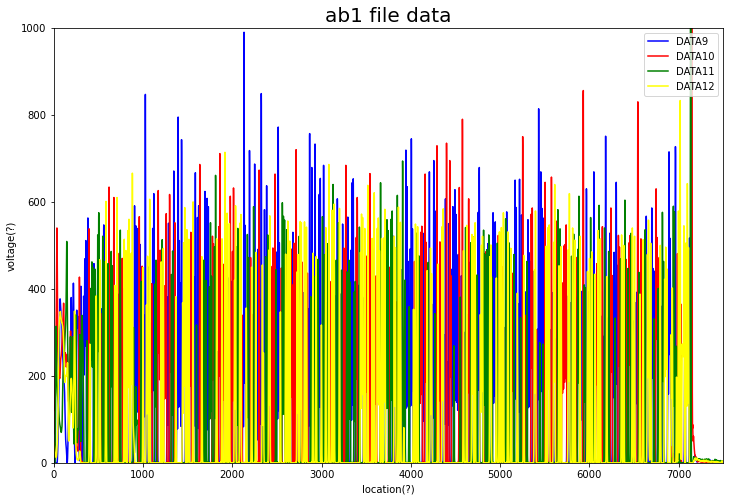

In [10]:
fig1, ax1 = plt.subplots()
ax1.plot(trace["DATA9"], color="blue", label = "DATA9")
ax1.plot(trace["DATA10"], color="red", label = "DATA10")
ax1.plot(trace["DATA11"], color="green",label = "DATA11")
ax1.plot(trace["DATA12"], color="yellow", label = "DATA12")

# a more explicit way to set labels
plt.xlabel('location(?)', fontsize = 10)
plt.ylabel('voltage(?)', fontsize = 10)
plt.title('ab1 file data', fontsize = 20)

plt.xlim([0, 7500])
plt.ylim([0, 1000])
fig1.set_size_inches(12, 8)
plt.legend(loc= 1)

fig1.savefig("images/ab1Test.png")
plt.show()
